## Free Text Strategies Analysis (FTSA_2020)

# Correlation analysis between free text analysis and previous Likert-questions analysis

#### Import tools

In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### Load and prepare data sets

In [2]:
nmf_df = pd.read_csv('../data/NMF_topic_l.csv')

In [3]:
factors_A2 = pd.read_csv('../data/FA_weights2.csv', sep=';', decimal=',')
factors_A2.rename(columns={'Unnamed: 0':'Qs'}, inplace=True)
factors_A2['Qs'] = [val.replace('.','-') for val in factors_A2.Qs.values]
factors_A3 = pd.read_csv('../data/FA_weights.csv', sep=';', decimal=',')
factors_A3.rename(columns={'Unnamed: 0':'Qs'}, inplace=True)
factors_A3['Qs'] = [val.replace('.','-') for val in factors_A3.Qs.values]

data_survey = pd.read_excel('../data/Survey_VDS_Kienberger2020.xlsx')
data_survey.rename(columns={'Unnamed: 0':'Index_survey'}, inplace=True)

P2df_cols = ['Index_survey']+list(factors_A2.Qs)
P2df = data_survey[P2df_cols]

P3df_cols = ['Index_survey']+list(factors_A3.Qs)
P3df = data_survey[P3df_cols]

I2 = P2df[list(factors_A2.Qs)].values
F2 = factors_A2[['MR1','MR2','MR3']].values

IF2 = pd.DataFrame(columns=['Index_survey']+list(factors_A2.columns[1:]))
IF2['Index_survey'] = P2df.Index_survey
IF2[list(factors_A2.columns[1:])] = np.matmul(I2,F2)
IF2.columns = ['Index_survey','MR1x','MR2x','MR3x']

I3 = P3df[list(factors_A3.Qs)].values
F3 = factors_A3[['MR1','MR2','MR3','MR4','MR5','MR6']].values

IF3 = pd.DataFrame(columns=['Index_survey']+list(factors_A3.columns[1:]))
IF3['Index_survey'] = P3df.Index_survey
IF3[list(factors_A3.columns[1:])] = np.matmul(I3,F3)

df_all = pd.merge(pd.merge(nmf_df,IF2,on = "Index_survey"),IF3, on = "Index_survey")

## Relation between `survey` and `commentaries`

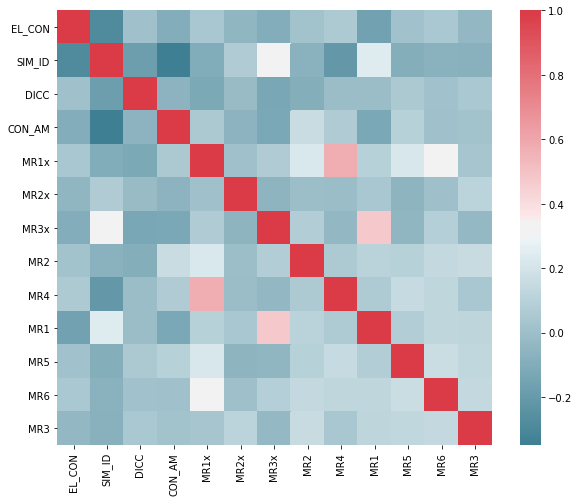

In [4]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df_all[df_all.columns[1:]].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax);

## Relation between `clusters` (free text / Likert)

In [8]:
data_survey[['Index_survey','A-Q2_labels','A-Q3_labels']]

df_clust = pd.merge(nmf_df[['Index_survey','labels']],data_survey[['Index_survey','A-Q2_labels','A-Q3_labels']],on = "Index_survey")

df_clust['labels'] = [int(l[-1]) for l in df_clust.labels]

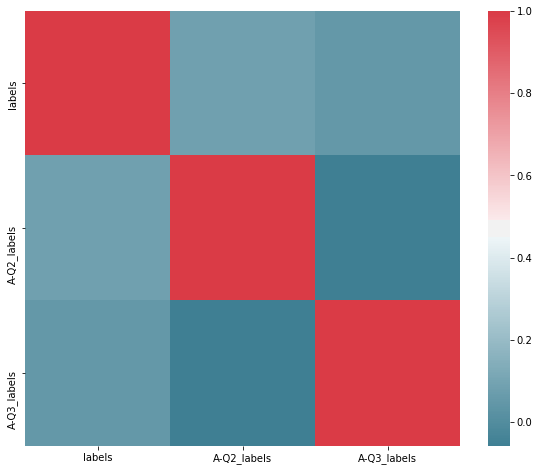

In [9]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = df_clust[df_clust.columns[1:]].corr('spearman')
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax);

In [10]:
corr

,labels,A-Q2_labels,A-Q3_labels
labels,1.000000,0.085737,0.053460
A-Q2_labels,0.085737,1.000000,-0.058091
A-Q3_labels,0.053460,-0.058091,1.000000
